In [1]:
import numpy as np
from numpy import pi,cos,exp,sqrt
from scipy.special import erf
import scipy as sp
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from scipy import special
# from mpmath import mp
from scipy.optimize import brentq

In [2]:
def steadystate(x,R):
    return np.sinh(R*(1-x))/np.cosh(R)

def steadystatesensitivity(x,R):
    return -(np.tanh(R)*np.tanh(R-R*x)+x-1)/R

def steadystatesensitivitynorm(x,R):
    return -(x-1)/R-np.tanh(R-R*x)/(R*np.tanh(R))

def steadystatenorm(x,R):
    return np.sinh(R*(1-x))/np.sinh(R)

## The next cell plots fig 1 from the paper.
#### Run the following cell to plot fig 1 from the paper and to save it as a png image.
##### Expected computational time: 5 seconds.

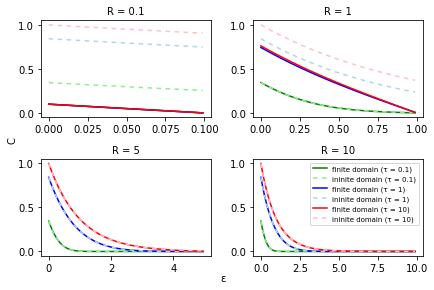

In [2]:
# This cell plots fig 1. It plot 4 subfigures, eachone for a different value of R (R=0.1, 1, 5 and 10). In each 
# subplot, the morphogen spatial profile using the analytic solution presented in work is obtained for three 
# different times (τ=0.1, 1, 10) and is compared to the solution obtained by using the analytic solution for an 
# infinite tissue.

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special

# Define functions used to calculate the morphogen concentration


# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in a finite tissue at the steady state using the analytic 
# solution presented in this work.
def ss_finite(x):
    return (np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))

# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)



# Creates the figure with 2x2 subplots.
fig, ax = plt.subplots(2, 2)
# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the lengths of the tissues that are going to be simulated.
lengths = [0.1, 1, 5, 10]
# Define colors that are going to be used when ploting the solutions
colors_line = ["g", "b", "r"]
colors_dashed = ["lightgreen", "lightblue", "pink"]
# Define the positions in the figure that are going to be used when plotting.
positions = [[0, 0], [0, 1], [1, 0], [1, 1]]
# Define a counter used when plotying
position_counter = 0
# Loop for all lengths
for length in lengths:
#     Set R to the dessired length
    R = length
#     Create an array of spatial coordintates for a tissue of length R.
    xi_all = np.arange(0,R,R/100)
#     A counter used to select the colors in the figures.
    color_counter = 0
#     A loop that goes through all desired times.
    for tf_counter in [0.1, 1, 10]:
#         Define empty arrays to fill with the concentration calculated.
        c1_finite = []
        c1_infinite = []
#         Loop in every position in space.
        for xi in xi_all:
#             Fill the arrays with the calculated concentration.
            c1_finite.append(c_finite(xi,tf_counter,j))
            c1_infinite.append(c_infinite(xi,tf_counter))
#         Creates each subplot. If R=10 it also adds a label.
        if R == 10:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, label="finite domain (τ = "+str(tf_counter)+")", color=colors_line[color_counter])
#             Plots the concentration in a infinite tissue as a dashed line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_infinite, label="ininite domain (τ = "+str(tf_counter)+")", color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
#             Adds a label.
            ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 7})
        else:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, color=colors_line[color_counter])
#             Plots the concentration in a infinite tissue as a dashed line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_infinite, color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
#         Update color counter.
        color_counter += 1
#     Set tittle.
    ax[positions[position_counter][0], positions[position_counter][1]].set_title("R = "+str(R),fontsize= 10)
#     Update position counter.
    position_counter += 1
# Axis label is added and the figure is saved as fig1.png and shown. 
fig.text(0.5,  0.01, 'ε', ha='center')
fig.text(0, 0.5, 'C', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("fig1.png", dpi=500)
plt.show()
plt.close()


## The next cell plots fig 2 from the paper.
#### Run the following cell to plot fig 2 from the paper and to save it as a png image.
##### Expected computational time: 1 minute.

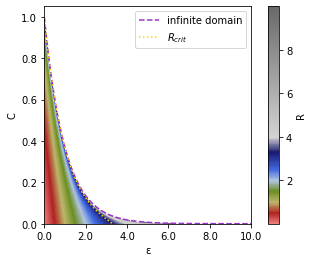

My program took 67.95259118080139 seconds to run


In [18]:
# This cell plots fig 2. It is a heatmap for different tissue lengths (R) that plots the concentration in time and 
# space. The solution for an infinite tissue and for R=Rcrit are added as dotted lines.

# Import libraries.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Function definition.

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This function calculates the morphogen concentration in a finite tissue at the steady state using the analytic 
# solution presented in this work.
def ss_finite(x,R):
    if x <= R:
        return (np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    else:
        return -1

# Defines arrays that are going to be used later.
steps = 1000
rrange = np.arange(0.001, 10,  0.001)
maxr = max(rrange)
xrange = np.arange(0, maxr + maxr/steps, maxr/steps)
matrix = np.empty((steps, len(xrange)))
matrix[:]=np.nan
r33pos = []
r33c = []
carr = []
xarr = []
rarr = []
infinitC = []
infinitPos = []
xaxis = np.arange(0, maxr+1, 2)
caxis = np.arange(0, 1+0.1, 0.2)
caxis1 = np.arange(0, steps+1, steps/5)
caxis= np.round(caxis, 2)

# Calculates the morphogen concentration in an infinite tissue.
for x in xrange:
    infinitPos.append(int(np.where(xrange==x)[0]))
    infinitC.append(ss_infinite(x)*steps)    

# For every R, calculates and stores the concentration in all the tissue.    
j = -1
for R in rrange:
    for x in xrange:
        j += 1
        carr = ss_finite(x, R)
        where = int(carr*steps)
        matrix[where, np.where(xrange==x)] = R
        if R == 3.3 and carr != -1:
            r33pos.append(int(np.where(xrange==x)[0]))
            r33c.append(where)

# Creates a colormap.
vmax = 10.0

cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
                                                    (0.5 / vmax, 'firebrick'),
                                                    (1 / vmax, 'darkkhaki'),
                                                    (1.5 / vmax, 'olivedrab'),
                                                    (2 / vmax, 'lightsteelblue'),
                                                    (2.5 / vmax, 'royalblue'),
                                                    (3.3 / vmax, 'midnightblue'),
                                                    (4 / vmax, 'lightgrey'),
                                                    (10 / vmax, 'dimgrey')]
                                        )
# cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'k'),
#                                                     (0.5 / vmax, 'midnightblue'),
#                                                     (1 / vmax, 'teal'),
#                                                     (1.5 / vmax, 'slategrey'),
#                                                     (2 / vmax, 'lightsteelblue'),
#                                                     (2.5 / vmax, 'mediumorchid'),
#                                                     (3.3 / vmax, 'lightcoral'),
#                                                     (4 / vmax, 'firebrick'),
#                                                     (10 / vmax, 'maroon')]
#                                         )
# cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'maroon'),
#                                                     (0.5 / vmax, 'firebrick'),
#                                                     (1 / vmax, 'lightcoral'),
#                                                     (1.5 / vmax, 'mediumorchid'),
#                                                     (2 / vmax, 'lightsteelblue'),
#                                                     (2.5 / vmax, 'slategrey'),
#                                                     (3.3 / vmax, 'teal'),
#                                                     (4 / vmax, 'midnightblue'),
#                                                     (10 / vmax, 'k')]
#                                         )
# cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
#                                                     (0.5 / vmax, 'firebrick'),
#                                                     (1 / vmax, 'darkkhaki'),
#                                                     (1.5 / vmax, 'olivedrab'),
#                                                     (2 / vmax, 'lightskyblue'),
#                                                     (2.5 / vmax, 'steelblue'),
#                                                     (3.3 / vmax, 'midnightblue'),
#                                                     (4 / vmax, 'lightgrey'),
#                                                     (10 / vmax, 'dimgrey')]
#                                         )

# Creates the heatmap.
plt.imshow(matrix, origin="lower",cmap = cmap)
# Set axis label and ticks.
plt.yticks(caxis1, caxis)
plt.xticks(caxis1, xaxis)
plt.xlabel("ε")
plt.ylabel("C")
# # Adds the solution for an infinite tissue as a dashed line.
# plt.plot(infinitPos, infinitC, color="forestgreen", ls="--", label="infinite domain", lw=2)
# # Adds the solution for R=Rcrit as a dashed line.
# plt.plot(r33pos, r33c, color="gold", ls=":", label="$R_{crit}$", dashes=(1, 3), lw=2)

# # Adds the solution for an infinite tissue as a dashed line.
# plt.plot(infinitPos, infinitC, color="darkorchid", ls="--", label="infinite domain")
# # Adds the solution for R=Rcrit as a dashed line.
# plt.plot(r33pos, r33c, color="gold", ls=":", label="$R_{crit}$")
# Adds the solution for an infinite tissue as a dashed line.
# plt.plot(infinitPos, infinitC, color="#0Dcc03", ls="--", label="infinite domain")
# # Adds the solution for R=Rcrit as a dashed line.
# plt.plot(r33pos, r33c, color="orange", ls=":", label="$R_{crit}$")
# plt.plot(r33pos, r33c, color="gold", ls="--", label="$R_{crit}$")
# plt.plot(infinitPos, infinitC, color="darkorchid", ls="--", label="infinite domain")

# Adds the solution for an infinite tissue as a dashed line.
plt.plot(infinitPos, infinitC, color="darkorchid", ls="--", label="infinite domain")
# Adds the solution for R=Rcrit as a dashed line.
plt.plot(r33pos, r33c, color="gold", ls=":", label="$R_{crit}$")
# Adds the colorbar.
cbar = plt.colorbar()
plt.legend()
cbar.set_label("R")
# Saves and shows the image
plt.savefig("fig2.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

## The next cell plots fig 3 from the paper.
#### Run the following cell to plot fig 3 from the paper and to save it as a png image.
##### Expected computational time: less than 5 seconds.

In [1]:
# Plots ε10 vs R in steady state and adds the position of Rcrit as a vertical dashed line.

# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Function is defined
# Calculates ε10 for a given R.
def epsilon10(R):
    return R-np.arcsinh(np.sinh(R)/10)

# Define the length of the r step.
dr=0.01
# Define the maximum value of R
Rmax = 10
# Define an array with all the R
lengths = np.arange(dr,Rmax+dr,dr)
# Define an empty array that is going to be used later
epsilon10values=[]
# Loop over all values of R.
for R in lengths:
#     Store the values of ε10.
    epsilon10values.append(epsilon10(R))
# Plot ε10 vs R
plt.plot(lengths,epsilon10values,color="black")
# Adds the position of Rcrit as a vertical dashed line.
plt.axvline(x=3.3, color="gold", ls=":",label="$R_{crit}$")
# Adds the value of epsilon10 in an infinite tissue
plt.axhline(y=np.log(10), color="darkorchid", ls="--", label="infinite domain")
# Adds the legend and name the axis.
plt.legend(loc=7)
plt.xlabel("R")
plt.ylabel(r"$\epsilon_{10}$")
# Set axis limits.
plt.xlim(0,10)
plt.ylim(0,2.5)
# Save the plot and show the figure.
plt.savefig("fig3.png", dpi=500)
plt.show()
plt.close()

<Figure size 640x480 with 1 Axes>

## The next cell plots fig 4 from the paper.
#### Run the following cell to plot fig 4 from the paper and to save it as a png image.
##### Expected computational time: arround 36 hours.

In [1]:
# Import libraries.
import numpy as np
from numpy import pi,cos,exp,sqrt
from scipy.special import erf
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import special
from mpmath import mp
from scipy.optimize import brentq
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import time
# A timer that calculates how much does the simulation take.
start_time = time.time()
# Define functions.
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j,R):
    return (j+1/2)*pi/R
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j,R):
    return np.cos(aux(j,R)*x)*(1/(aux(j,R)**2+1))*(np.exp(-((((aux(j,R))**2)+1)*t)))
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j,R):
    return (-2/R)*sum(aux2(x,t,j,R))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)
# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))
# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)
# Calculates C(ε=O,τ)/10-C(ε=x,τ) for a position x for a finite tissue at time τ.
def distance(x,t,R):
    return c_finite(0,t,j,R)/10-c_finite(x,t,j,R)
# Find the minimun of the previuos function.
def minimum_distance(t, R):
    return sp.optimize.brentq(distance, 0, R, args = (t,R))
# Calculates Rcrit for an infinite domain at time t.
def e10_infinite_domain(t):
#     Define necesary arrays and variables.
    R=10
    xi_all = np.arange(0,R,0.001)
    distancia = []
    posible_distance= []
#     Loop over every position.
    for xi in xi_all:
#         Calculate C(ε=O,τ)/10-C(ε=xi,τ) for a position xi for a finite tissue at time τ.
        posible_distance.append(np.absolute(c_infinite(0,t)/10-c_infinite(xi,t)))  
#     Returns the minimum of the previous function.
    return np.argmin(posible_distance)/1000
# Define arrays needed for the simulation.
carr = []
xarr = []
rarr = []
S=1
j = np.arange(0,5000,1)
steps = 1000
maxtime = 2.5
dr=0.001
lengths = np.arange(dr, 10+dr,  dr)
maxr = max(lengths)
times = np.arange(0, maxr + maxr/steps, maxr/steps)
matrix = np.empty((steps+1, len(positions)))
matrix[:]=np.nan
r33pos = []
r33c = []
infinitC = []
infinitPos = []
# Loop over every position.
for t in times:
#     Find the value of tau in the matrix.   
    infinitPos.append(int(np.where(times==t)[0]))
#     Find the value of epsilon10 and reshape it with the matrix size
    infinitC.append(e10_infinite_domain(t)*steps/maxtime)   
# Loop over every length.
for r in lengths:
#     Loop over every time.
    for t in times:
#         Find the value of epsilon10.
        carr = minimum_distance(t, r)
#         Find the value of tau.
        where = int(carr*steps/maxtime)
#         Add R to the matrix.
        matrix[where, np.where(times==t)] = r
#         Calculates epsilon 10 for Rcrit.
        if r == 3.3 and carr != -1:
#             Find the value of tau in the matrix.
            r33pos.append(int(np.where(times==t)[0]))
#             Find the value of epsilon10 in the matrix.    
            r33c.append(where)
# Define auxiliary arrays.
xaxis = np.arange(0, maxr+1, 2)
caxis = np.arange(0, maxtime+0.5, maxtime/5)
caxis1 = np.arange(0, steps+1, steps/5)
caxis= np.round(caxis, 2)
# Creates custom colormap for the heatmap.
vmax = 10.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
                                                    (0.5 / vmax, 'firebrick'),
                                                    (1 / vmax, 'darkkhaki'),
                                                    (1.5 / vmax, 'olivedrab'),
                                                    (2 / vmax, 'lightsteelblue'),
                                                    (2.5 / vmax, 'royalblue'),
                                                    (3.3 / vmax, 'midnightblue'),
                                                    (4 / vmax, 'lightgrey'),
                                                    (10 / vmax, 'dimgrey')]
                                        )

# Creates heatmap.
plt.clf()
plt.imshow(matrix, origin="lower",cmap = cmap)
plt.yticks(caxis1, caxis)
plt.xticks(caxis1, xaxis)
plt.xlabel("τ")
plt.ylabel(r"$\epsilon_{10}$")
# Adds epsilon10 for Rcrit as a dotted line.
plt.plot(r33pos, r33c, color="gold", ls=":", label="$R_{crit}$")
# Adds epsilon10 for an infinite domain as a dashed line.
plt.plot(infinitPos, infinitC, color="darkorchid", ls="--", label="infinite domain")
cbar = plt.colorbar()
plt.legend(loc=4)
cbar.set_label("R")

# Saves the figure.
plt.tight_layout()
plt.savefig("fig4.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how long the program took to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

Infinit position
Heatmap
(1001, 1001)


<Figure size 640x480 with 2 Axes>

My program took 81320.41109061241 seconds to run


## The next cell plots fig 5 from the paper.
#### Run the following cell to plot fig 5 from the paper and to save it as a png image.
##### Expected computational time: 5 seconds.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


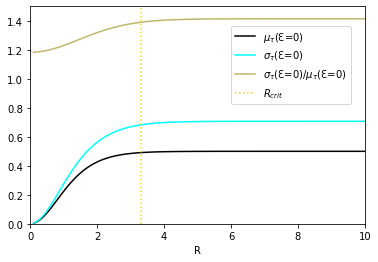

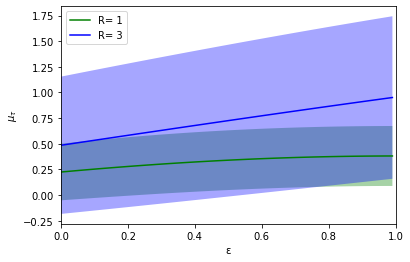

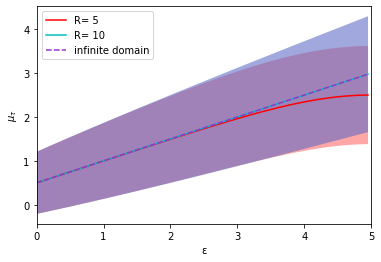

In [36]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Define functions

def aux(x,j):
    return (np.cos(((j+1/2)*np.pi/R)*x))/(((((j+1/2)*np.pi/R)**2+1)**2)*(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R))))

def mean_time_finite(x,j):
    return 2*sum(aux(x,j))/R

def aux2(x,j):
    return (np.cos(((j+1/2)*np.pi/R)*x))/(((((j+1/2)*np.pi/R)**2+1)**3)*(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R))))

def aux3(x,j):
    return 2*2*sum(aux2(x,j))/R

def standard_deviation_finite(x,j):
    return np.sqrt(aux3(x,j)-mean_time_finite(x,j)**2)

def mean_time_infinite(x):
    return (1+x)/2

def aux4(x):
    return x*x/4+3*x/4+3/4
# +(x*x-3*x+3)*np.exp(2*x)

def standard_deviation_infinite(x):
    return np.sqrt(aux4(x)-mean_time_infinite(x)**2)

# This part of the code plots and save fig. 5 panel a.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = np.arange(0,10+0.1,10/100)
mean_time = []
std_dev = []
ratio = []
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the mean time for an finite tissue at ε=0.
    mean_time.append(mean_time_finite(0,j))
# Plot the mean time for an finite tissue at ε=0.
plt.plot(lengths, mean_time, label="$μ_{τ}$(Ɛ=0)", color="black")
plt.legend()
plt.xlabel("R")
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the standard deviation for an finite tissue at ε=0.
    std_dev.append(standard_deviation_finite(0,j))
# Plot the standard deviation for an finite tissue at ε=0.
plt.plot(lengths, std_dev, label="$σ_{τ}$(Ɛ=0)", color="aqua")
plt.legend()
plt.xlabel("R")
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the standard deviation divided by the mean time for an finite tissue at ε=0.
    ratio.append(standard_deviation_finite(0,j)/mean_time_finite(0,j))
# Plot the standard deviation divided by the mean time for an finite tissue at ε=0.
plt.plot(lengths, ratio, label="$σ_{τ}$(Ɛ=0)/$μ_{τ}$(Ɛ=0)", color="darkkhaki")
plt.legend()
plt.xlabel("R")
# Plot a vertical line in the position of Rcrit.
plt.axvline(x=3.3, color="gold", ls=":", label="$R_{crit}$")
plt.legend(loc=(0.6,0.55))
# Set axis limits
plt.xlim(0,10)
plt.ylim(0,1.5)
# Save the figure.
plt.savefig("fig5a.png", dpi=500)
plt.show()
plt.close()

# This part of the code plots and save fig. 5 panel b.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = [1, 3]
colors = ["g", "b"]
# A counter that is going to be used to choose the color in the plot.
i=0
# Loop over all lenghts.
for length in lengths:
    R=length
    xi_all = np.arange(0,1,1/100)
    # Define necessary arrays to be used in the simulation.
    mean_time = []
    std_dev = []
#     Loop over all positions in the tissue.
    for xi in xi_all:
#         Save in an array the mean time in every position of the tissue.
        mean_time.append(mean_time_finite(xi,j))
#         Save in an array the standard deviation in every position of the tissue.
        std_dev.append(standard_deviation_finite(xi,j))
#     Change the arrays to numpy arrays
    mean_time = np.array(mean_time)
    std_dev = np.array(std_dev)
#     Plot the figure.
    plt.plot(xi_all, mean_time, label="R= "+str(R), color=colors[i])
    plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor=colors[i])
    plt.legend(loc=2)
    plt.xlabel("ε")
    plt.ylabel("$μ_{τ}$")
    i+=1
# Set x axis limits
plt.xlim(0,1)
# Save the figure.
plt.savefig("fig5b.png", dpi=500)
plt.show()

# This part of the code plots and save fig. 5 panel c.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = [5, 10]
colors = ["r", "c"]
# A counter that is going to be used to choose the color in the plot.
i=0
# Loop over all lenghts.
for length in lengths:
    R=length
    xi_all = np.arange(0,5,5/100)
    # Define necessary arrays to be used in the simulation.
    mean_time = []
    std_dev = []
#     Loop over all positions in the tissue.    
    for xi in xi_all:
#         Save in an array the mean time in every position of the tissue.
        mean_time.append(mean_time_finite(xi,j))
#         Save in an array the standard deviation in every position of the tissue.
        std_dev.append(standard_deviation_finite(xi,j))
#     Change the arrays to numpy arrays
    mean_time = np.array(mean_time)
    std_dev = np.array(std_dev)
#     Plot the figure.    
    plt.plot(xi_all, mean_time, label="R= "+str(R), color=colors[i])
    plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor=colors[i])
    plt.legend(loc=2)
    plt.xlabel("ε")
    plt.ylabel("$μ_{τ}$")
    i+=1
# Define necessary arrays to be used in the simulation.    
mean_time = []
std_dev = []
# Loop over all positions in the tissue.    
for xi in xi_all:
#    Save in an array the mean time in every position of the tissue.
    mean_time.append(mean_time_infinite(xi))
#    Save in an array the standard deviation in every position of the tissue.
    std_dev.append(standard_deviation_infinite(xi))
# Change the arrays to numpy arrays
mean_time = np.array(mean_time)
std_dev = np.array(std_dev)
# Plot the figure.   
plt.plot(xi_all, mean_time, color="darkorchid", ls="--",label="infinite domain")
plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor="darkorchid")
plt.legend(loc=2)
plt.xlabel("ε")
plt.ylabel("$μ_{τ}$")
# Set x axis limits
plt.xlim(0,5)
# Save the figure.   
plt.savefig("fig5c.png", dpi=500)
plt.show()





## The next cell plots fig 6 from the paper.
#### Run the following cell to plot fig 6 from the paper and to save it as a png image.
##### Expected computational time: 12 minutes.

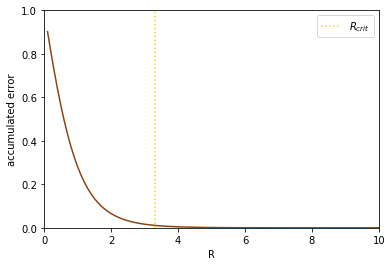

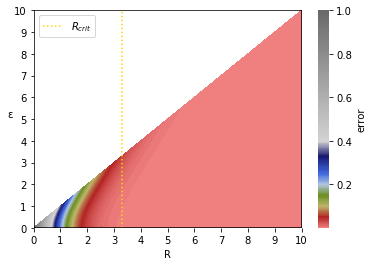

My program took 692.4568083286285 seconds to run


In [2]:
# Import libraries.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import time
# A timer that calculates how much does the simulation take.
start_time = time.time()
# Define functons.
# Calculate the steady state spatial morphogen concentration for a finite tissue.
def cfin(x,R):
    return np.sinh(-x+R)/np.cosh(R)
# Calculate the steady state spatial morphogen concentration for an infinite domain.
def cinf(x):
    return np.exp(-x)
# Calculate the error of using the steady state spatial morphogen concentration for an infinite domain with respect of the steady state spatial morphogen concentration for a finite tissue.
def error(x,R):
    return (cinf(x)-cfin(x,R))
# Calculate the accumulated error using the simpson method to simulate the integral numerically.
def accumulated_error(R):
    n=100
    h=R/n
    aux=0
    for i in range(1,50+1,1):
        aux+=error((2*i-2)*R/n,R)+4*error((2*i-1)*R/n,R)+error((2*i)*R/n,R)
    aux=aux*h/3
    return aux

# Define parameters and arrays necesary for the simulation.
dr=0.1
Rmax = 10
lengths = np.arange(dr,Rmax+dr,dr)
acc_er=[]
# Loop over every R
for ri in lengths:
#     Calculates the accumulated error for every R
    acc_er.append(accumulated_error(ri)/ri)
# Plot accumulated error vs R
plt.plot(lengths,acc_er, color="saddlebrown")
# Add the position of Rcritic
plt.axvline(x=3.3, color="gold", ls=":", label="$R_{crit}$")
# Set axis name and save the figure.
plt.legend()
plt.xlabel("R")
plt.ylabel("accumulated error")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.savefig("fig6-b.png", dpi=500)
plt.show()
plt.close()




# Define parameters and arrays necesary for the simulation.
dr=0.001
Rmax = 10
lengths = np.arange(0,Rmax+dr,dr)
positions = np.arange(0,Rmax+dr,dr)
errores = np.empty((int(Rmax/dr+1),int(Rmax/dr+1)))
errores[:]=np.nan

# Loop over every R
for R in lengths:
#     Loop over every position.
    for x in positions:
        if x<=R:
#             Calculate the error.
            errores[int(x/dr),int(R/dr)]=error(x,R)
# Creates custom colormap for the heatmap.
vmax = 10.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
                                                    (0.5 / vmax, 'firebrick'),
                                                    (1 / vmax, 'darkkhaki'),
                                                    (1.5 / vmax, 'olivedrab'),
                                                    (2 / vmax, 'lightsteelblue'),
                                                    (2.5 / vmax, 'royalblue'),
                                                    (3.3 / vmax, 'midnightblue'),
                                                    (4 / vmax, 'lightgrey'),
                                                    (10 / vmax, 'dimgrey')]
                                        )
# Creates heatmap of error vs R and position.
ax = sns.heatmap(errores,xticklabels=lengths, yticklabels=positions, cmap=cmap,cbar_kws={'label': 'error'})
# Set axis values and names.
new_labels=[0,1,2,3,4,5,6,7,8,9,10]
new_ticks = np.linspace(0, int(Rmax/dr), len(new_labels))
ax.set_xticks(new_ticks)
ax.set_xticklabels(new_labels)
ax.set_yticks(new_ticks)
ax.set_yticklabels(new_labels)
ax.invert_yaxis()
plt.xticks(rotation=0)
plt.xlabel("R")
plt.ylabel("ε",rotation=0)
# Add the position of Rcrit.
plt.axvline(x=3.3/dr, color="gold", ls=":",label="$R_{crit}$")
plt.legend(loc=2)
plt.axvline(x=0, color="black")
plt.axvline(x=Rmax/dr, color="black")
plt.axhline(y=0, color="black")
plt.axhline(y=Rmax/dr, color="black")
# Saves the figure.
plt.savefig("fig6-a.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how long the program took to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

## The next cell plots fig S.1 from the paper.
#### Run the following cell to plot fig S.1 from the paper and to save it as a png image.
##### Expected computational time: Between 2 and 3 hours.

In [1]:
# Figure S.1. Comparison between the numerical and analytical solution for the concentration as a
# function of space for different times.

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))

# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)

# This part of the code will plot the analytical solution.

# Creates the figure with 2x2 subplots.
fig, ax = plt.subplots(2, 2)
# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the lengths of the tissues that are going to be simulated.
lengths = [0.1, 1, 5, 10]
# Define the times that are going to be simulated.
times = [0.1, 1, 10]
# Define colors that are going to be used when ploting the solutions
colors_line = ["g", "b", "r"]
colors_dashed = ["lightgreen", "lightblue", "pink"]
# Define the positions in the figure that are going to be used when plotting.
positions = [[0, 0], [0, 1], [1, 0], [1, 1]]
# Define a counter used when plotying
position_counter = 0
# Loop for all lengths
for length in lengths:
#     Set R to the dessired length
    R = length
#     Create an array of spatial coordintates for a tissue of length R.
    xi_all = np.arange(0,R,R/100)
#     A counter used to select the colors in the figures.
    color_counter = 0
#     A loop that goes through all desired times.
    for tf_counter in times:
#         Define empty arrays to fill with the concentration calculated.
        c1_finite = []
        c1_infinite = []
#         Loop in every position in space.
        for xi in xi_all:
#             Fill the arrays with the calculated concentration.
            c1_finite.append(c_finite(xi,tf_counter,j))
            c1_infinite.append(c_infinite(xi,tf_counter))
#         Creates each subplot. If R=10 it also adds a label.
        if R == 10:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, label="finite domain (τ = "+str(tf_counter)+")", color=colors_line[color_counter])
#             Adds a label.
            ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 7})
        else:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, color=colors_line[color_counter])
#         Update color counter.
        color_counter += 1
#     Set tittle.
    ax[positions[position_counter][0], positions[position_counter][1]].set_title("R = "+str(R),fontsize= 10)
#     Update position counter.
    position_counter += 1

# This part of the code will plot the numerical solution.

# Define arrays to be used later.    
lengths = [0.1, 1, 5, 10]
times = [0.1, 1, 10]
color_counter = 0
position_counter = 0
# Loop over all tissue lengths.
for length in lengths:
    R = length
#     Set the number of positions in the tissue
    nx=100;
#     Set the length of each position step
    dx=length/nx;
#     Set the time step such that the simulation does not oscilate
    dt=(dx**2)/3;
#     Calculate the maximun number of times to be simulated.
    nt=int(10/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,2]);
    color_counter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
#             Calculate the new concentration.
            p1[xi,1]=p1[xi,0]+dt*((p1[xi+1,0]-2*p1[xi,0]+p1[xi-1,0])/np.power(dx,2))-dt*p1[xi,0];
#         Boundary conditions.
        p1[nx-1,1]=0;
        p1[0,1]=p1[2,0]+2*dx;
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            p1[xi,0]=p1[xi,1]
#         if the current time is of our interest we enter here.        
        if round(m*dt,10) in times:
            ctoplot=[]
#             Add the concentration to an array to plot it.
            for xi in np.arange(0,nx):
                ctoplot.append(p1[xi,1])           
#         Creates each subplot. If R=10 it also adds a label.
            if R == 10:
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, label="Numerical solution (τ = "+str(round(m*dt,10))+")", color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
#             Adds a label.
                ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 7})
            else:  
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
    #         Update color counter.
            color_counter += 1
#         Update position counter.
    position_counter += 1
# Axis label is added and the figure is saved as figsup.png and shown. 
fig.text(0.5,  0.01, 'ε', ha='center')
fig.text(0, 0.5, 'C', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("figsup.png", dpi=500)
plt.show()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

<Figure size 640x480 with 4 Axes>

My program took 7910.223972797394 seconds to run


## The next cell calculates the values of Table S.1.  from the paper.
#### Run the following cell to calculates the values of Table S.1. from the paper and to save it as a png image.
##### Expected computational time: Between 2 and 3 hours.

In [4]:
# Table S.1. Comparison between the computational time needed to perform the simulation using
# the numerical and analytical solution for the concentration as a function of space for different
# times with different domain length (R).

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Define functions used to calculate the morphogen concentration


# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This part calculates the optimal number of j according to the condition described in the paper.
# define variables that are going to be used later.
jmax=100
times=[0.1,1,10]
lengths=[0.1,1,10]
array1=[]
# Loop over all tissue lengths.
for length in lengths:
    R=length
#     loop over all times.
    for t in times:
#         loop over each position in the tissue.
        for xi in np.arange(0,length*1.01,length*0.01):
#             adds a condition when the optumum j is not found.
            found=False
#             Loop over all values of j.
            for i in range(1,jmax,1):
#                 Set j array and j+1 array.
                j = np.arange(0,i,1)
                k = np.arange(0,i+1,1)
#                 if the condition is met and it j optimum was not previously found it enters.
                if not found and abs(c_finite(xi,t,k)/c_finite(xi,t,j)-1)<0.00001:
#                     change condition
                    found=True
#                     add possible j optimum
                    array1.append(i)
# Find the maxmum j needed.
numberofj=max(array1)

# Calculates how much time does it take to compute the analytical solution presented in this paper.
    
# Define arrays to be used later.
times=[0.1,1,10]
lengths=[0.1,1,10]
# Loop over different lenghts.
for length in lengths:
    R=length
#     Start counting computational time
    start_time = time.time()
#     Loop over the desired times.
    for t in times:
        carray=[]
#         Loop over the tissue positions.
        for xi in np.arange(0,length*1.01,length*0.01):
            j = np.arange(0,numberofj,1)
#             Save in an array the concentration obtained by the analytical solution.
            carray.append(c_finite(xi,t,j))
#         Shows on screen the time it took to perfom the calculation.
        print("My program took "+str(time.time() - start_time)+" seconds to run the analytical solution for R="+str(R)+" and time="+str(t))

# Calculates how much time does it take to compute the anumerical solution using finite differences.

# Define arrays to be used later.
lengths = [0.1, 1, 10]
times = [0.1, 1, 10]
# Loop over different lenghts.
for length in lengths:
    R = length
#     Start counting computational time
    start_time = time.time() 
#     Set the number of positions in the tissue
    nx=100;
#     Set the length of each position step
    dx=length/nx;
#     Set the time step such that the simulation does not oscilate
    dt=(dx**2)/3;
#     Calculate the maximun number of times to be simulated.
    nt=int(10/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,2]);
    p1saved = np.zeros([nx,len(times)]);
    p1savedcounter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
#             Calculate the new concentration.
            p1[xi,1]=p1[xi,0]+dt*((p1[xi+1,0]-2*p1[xi,0]+p1[xi-1,0])/np.power(dx,2))-dt*p1[xi,0];
#         Boundary conditions.
        p1[nx-1,1]=0;
        p1[0,1]=p1[2,0]+2*dx;
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            p1[xi,0]=p1[xi,1]
#         if the current time is of our interest we enter here.
        if round(m*dt,10) in times:
#             Saves that time in an array.
            for xi in np.arange(0,nx):
                p1saved[xi,p1savedcounter]=p1[xi,1]
            p1savedcounter += 1
#             Shows on screen the time it took to perfom the calculation.
            print("My program took "+str(time.time() - start_time)+" seconds to run the numerical solution for R="+str(R)+" and time="+str(m*dt))

My program took 0.002408742904663086 seconds to run the analytical solution for R=0.1 and time=0.1
My program took 0.005003213882446289 seconds to run the analytical solution for R=0.1 and time=1
My program took 0.007408618927001953 seconds to run the analytical solution for R=0.1 and time=10
My program took 0.0024671554565429688 seconds to run the analytical solution for R=1 and time=0.1
My program took 0.005002021789550781 seconds to run the analytical solution for R=1 and time=1
My program took 0.0075075626373291016 seconds to run the analytical solution for R=1 and time=10
My program took 0.002433300018310547 seconds to run the analytical solution for R=10 and time=0.1
My program took 0.004902362823486328 seconds to run the analytical solution for R=10 and time=1
My program took 0.007421255111694336 seconds to run the analytical solution for R=10 and time=10
My program took 77.96837592124939 seconds to run the numerical solution for R=0.1 and time=0.09999999999999999
My program too